In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons, make_circles
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [2]:
def dibuja_dataset(X, y):  
    from matplotlib.colors import ListedColormap
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    plt.scatter(X[:,0], X[:, 1], c=y, cmap=cm_bright, edgecolors='k')

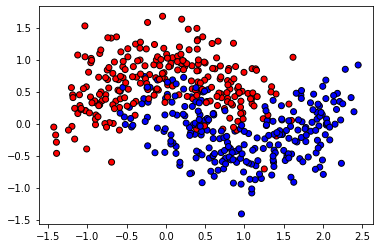

In [3]:
dataset_X, dataset_y = make_moons(noise=0.3, n_samples = 500, random_state=0)

dibuja_dataset(dataset_X, dataset_y)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(dataset_X, dataset_y, test_size=.3, random_state=42)

In [5]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)
y_predicted = logistic.predict(X_test)

In [6]:
print("accuracy: {}".format(accuracy_score(y_test,y_predicted))) # Malo para dataset desbalanceado
print("precision_score: {}".format(precision_score(y_test,y_predicted)))
print("recall_score: {}".format(recall_score(y_test,y_predicted)))
print("F1: {}".format(f1_score(y_test,y_predicted))) # Metrica de media geometrica entre el precision y el recall

accuracy: 0.8533333333333334
precision_score: 0.8805970149253731
recall_score: 0.8082191780821918
F1: 0.8428571428571429


#### El resultado es muy bueno

### Vamos a hacerlo mas no-lineal

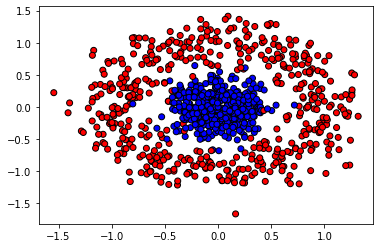

In [7]:

dataset_X, dataset_y  = X, y = make_circles(n_samples=1000, factor=.1, noise=.2,random_state=102)

dibuja_dataset(dataset_X, dataset_y)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(dataset_X, dataset_y, test_size=.3, random_state=42)

In [9]:
pd.DataFrame(dataset_X).head()

,0,1
0,0.907603,-0.355826
1,1.243967,-0.517380
2,-0.075039,0.088112
3,-0.613492,0.685260
4,-0.622778,-0.849384


In [10]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)
y_predicted = logistic.predict(X_test)

In [11]:
print("accuracy: {}".format(accuracy_score(y_test,y_predicted)))
print("precision_score: {}".format(precision_score(y_test,y_predicted)))
print("recall_score: {}".format(recall_score(y_test,y_predicted)))
print("F1: {}".format(f1_score(y_test,y_predicted)))

accuracy: 0.3933333333333333
precision_score: 0.3939393939393939
recall_score: 0.33766233766233766
F1: 0.36363636363636365


In [12]:
print(logistic.coef_)
print(np.absolute(logistic.coef_).sum())

[[-0.19421923 -0.04993096]]
0.24415019405323077


#### El resultado ahora es muy malo

### Vamos a añadir nuevas caracteristicas, a ver que pasa....

In [15]:
#dataset_X_mas_variables =np.concatenate((dataset_X, 
#                                       np.reshape(dataset_X[:,0]**2,(-1,1)), 
#                                       np.reshape(dataset_X[:,1]**2, (-1,1) )), axis=1)

In [13]:
dataset_X_mas_variables = pd.DataFrame(dataset_X)
dataset_X_mas_variables['2'] = dataset_X[:,0]**2
dataset_X_mas_variables['3'] = dataset_X[:,1]**2
dataset_X_mas_variables.head()

,0,1,2,3
0,0.907603,-0.355826,0.823744,0.126612
1,1.243967,-0.517380,1.547454,0.267682
2,-0.075039,0.088112,0.005631,0.007764
3,-0.613492,0.685260,0.376373,0.469581
4,-0.622778,-0.849384,0.387853,0.721454


In [14]:
X_train, X_test, y_train, y_test = train_test_split(dataset_X_mas_variables, dataset_y, test_size=.3, random_state=42)

In [15]:
X_train.head()

,0,1,2,3
541,0.003813,-0.178409,0.000015,0.031830
440,0.318188,0.899135,0.101244,0.808443
482,0.552658,-0.342019,0.305431,0.116977
422,-0.005901,-0.233028,0.000035,0.054302
778,-0.041129,-0.051963,0.001692,0.002700


In [16]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)
y_predicted = logistic.predict(X_test)

In [17]:
print("accuracy: {}".format(accuracy_score(y_test,y_predicted)))
print("precision_score: {}".format(precision_score(y_test,y_predicted)))
print("recall_score: {}".format(recall_score(y_test,y_predicted)))
print("F1: {}".format(f1_score(y_test,y_predicted)))

accuracy: 0.9766666666666667
precision_score: 0.9622641509433962
recall_score: 0.9935064935064936
F1: 0.9776357827476039


In [18]:
print(logistic.coef_)
print(np.absolute(logistic.coef_).sum())

[[-0.12142286 -0.25455373 -6.48632293 -6.72661786]]
13.588917377702474


#### El resultado ahora ha mejorado mucho añadiendo nuevas variables no-lineales

## Pero que sucede si nos pasamos añadiendo variables

In [295]:
dataset_X_mas_variables = pd.DataFrame(dataset_X)
dataset_X_mas_variables['2'] = dataset_X[:,0]**2
dataset_X_mas_variables['3'] = dataset_X[:,1]**2
dataset_X_mas_variables['4'] = dataset_X[:,0]**3
dataset_X_mas_variables['5'] = dataset_X[:,1]**3
dataset_X_mas_variables['6'] = dataset_X[:,0]**4
dataset_X_mas_variables['7'] = dataset_X[:,1]**4

dataset_X_mas_variables.head()

,0,1,2,3,4,5,6,7
0,0.907603,-0.355826,0.823744,0.126612,0.747633,-0.045052,0.678554,0.016031
1,1.243967,-0.517380,1.547454,0.267682,1.924981,-0.138494,2.394613,0.071654
2,-0.075039,0.088112,0.005631,0.007764,-0.000423,0.000684,0.000032,0.000060
3,-0.613492,0.685260,0.376373,0.469581,-0.230902,0.321785,0.141657,0.220506
4,-0.622778,-0.849384,0.387853,0.721454,-0.241546,-0.612792,0.150430,0.520496


In [296]:
X_train, X_test, y_train, y_test = train_test_split(dataset_X_mas_variables, dataset_y, test_size=.3, random_state=42)

In [297]:
X_train.head()

,0,1,2,3,4,5,6,7
541,0.003813,-0.178409,0.000015,0.031830,5.544389e-08,-0.005679,2.114162e-10,0.001013
440,0.318188,0.899135,0.101244,0.808443,3.221457e-02,0.726899,1.025030e-02,0.653580
482,0.552658,-0.342019,0.305431,0.116977,1.687989e-01,-0.040008,9.328805e-02,0.013684
422,-0.005901,-0.233028,0.000035,0.054302,-2.054819e-07,-0.012654,1.212545e-09,0.002949
778,-0.041129,-0.051963,0.001692,0.002700,-6.957475e-05,-0.000140,2.861556e-06,0.000007


In [298]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)
y_predicted = logistic.predict(X_test)

In [299]:
print("accuracy: {}".format(accuracy_score(y_test,y_predicted)))
print("precision_score: {}".format(precision_score(y_test,y_predicted)))
print("recall_score: {}".format(recall_score(y_test,y_predicted)))
print("F1: {}".format(f1_score(y_test,y_predicted)))

accuracy: 0.9733333333333334
precision_score: 0.95625
recall_score: 0.9935064935064936
F1: 0.9745222929936306


In [300]:
print(logistic.coef_)
print(np.absolute(logistic.coef_).sum())

[[-0.08757466 -0.3372261  -5.11625591 -5.39213874 -0.11106559  0.06847972
  -2.66346045 -2.8336323 ]]
16.6098334668


#### El resultado empeora..

## Y si añadimos más....

In [307]:
dataset_X_mas_variables = pd.DataFrame(dataset_X)
dataset_X_mas_variables['2'] = dataset_X[:,0]**2
dataset_X_mas_variables['3'] = dataset_X[:,1]**2
dataset_X_mas_variables['4'] = dataset_X[:,0]**3
dataset_X_mas_variables['5'] = dataset_X[:,1]**3
dataset_X_mas_variables['6'] = dataset_X[:,0]**4
dataset_X_mas_variables['7'] = dataset_X[:,1]**4
dataset_X_mas_variables['10'] = dataset_X[:,0]**5
dataset_X_mas_variables['11'] = dataset_X[:,1]**5
dataset_X_mas_variables['12'] = dataset_X[:,0]**6
dataset_X_mas_variables['13'] = dataset_X[:,1]**6
dataset_X_mas_variables.head()

,0,1,2,3,4,5,6,7,10,11,12,13
0,0.907603,-0.355826,0.823744,0.126612,0.747633,-0.045052,0.678554,0.016031,0.615858,-0.005704,5.589550e-01,2.029685e-03
1,1.243967,-0.517380,1.547454,0.267682,1.924981,-0.138494,2.394613,0.071654,2.978819,-0.037072,3.705553e+00,1.918048e-02
2,-0.075039,0.088112,0.005631,0.007764,-0.000423,0.000684,0.000032,0.000060,-0.000002,0.000005,1.785298e-07,4.679481e-07
3,-0.613492,0.685260,0.376373,0.469581,-0.230902,0.321785,0.141657,0.220506,-0.086905,0.151104,5.331573e-02,1.035454e-01
4,-0.622778,-0.849384,0.387853,0.721454,-0.241546,-0.612792,0.150430,0.520496,-0.093685,-0.442101,5.834469e-02,3.755135e-01


In [308]:
X_train, X_test, y_train, y_test = train_test_split(dataset_X_mas_variables, dataset_y, test_size=.3, random_state=42)

In [309]:
X_train.head()

,0,1,2,3,4,5,6,7,10,11,12,13
541,0.003813,-0.178409,0.000015,0.031830,5.544389e-08,-0.005679,2.114162e-10,0.001013,8.061628e-13,-1.807515e-04,3.074025e-15,3.224766e-05
440,0.318188,0.899135,0.101244,0.808443,3.221457e-02,0.726899,1.025030e-02,0.653580,3.261523e-03,5.876569e-01,1.037778e-03,5.283827e-01
482,0.552658,-0.342019,0.305431,0.116977,1.687989e-01,-0.040008,9.328805e-02,0.013684,5.155639e-02,-4.680064e-03,2.849306e-02,1.600671e-03
422,-0.005901,-0.233028,0.000035,0.054302,-2.054819e-07,-0.012654,1.212545e-09,0.002949,-7.155213e-12,-6.871357e-04,4.222280e-14,1.601220e-04
778,-0.041129,-0.051963,0.001692,0.002700,-6.957475e-05,-0.000140,2.861556e-06,0.000007,-1.176936e-07,-3.788406e-07,4.840645e-09,1.968556e-08


In [310]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)
y_predicted = logistic.predict(X_test)

In [311]:
print("accuracy: {}".format(accuracy_score(y_test,y_predicted)))
print("precision_score: {}".format(precision_score(y_test,y_predicted)))
print("recall_score: {}".format(recall_score(y_test,y_predicted)))
print("F1: {}".format(f1_score(y_test,y_predicted)))

accuracy: 0.97
precision_score: 0.9503105590062112
recall_score: 0.9935064935064936
F1: 0.9714285714285714


#### El resultadoes peor...

### Evolucion segun añadimos variables

In [373]:
test_f1 = []
test_acc = []

dataset_X_mas_variables = pd.DataFrame(dataset_X)
max_dim = 35
for i in range (2,max_dim):
    dataset_X_mas_variables[i] = dataset_X[:,0]**(i*2)
    dataset_X_mas_variables[i+1] = dataset_X[:,1]**(i*2)
    
    X_train, X_test, y_train, y_test = train_test_split(dataset_X_mas_variables, dataset_y, test_size=.3, random_state=42)
    logistic = LogisticRegression()
    logistic.fit(X_train, y_train)
    y_predicted = logistic.predict(X_test)

    test_f1.append(f1_score(y_test,y_predicted))
    test_acc.append(accuracy_score(y_test,y_predicted))

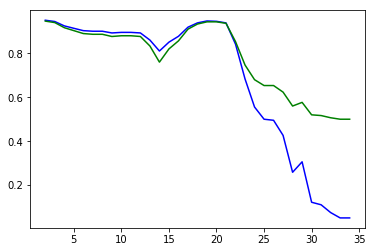

In [374]:
plt.plot(range (2,max_dim), test_f1, color='b')
plt.plot(range (2,max_dim), test_acc, color='g')

### La caida se debe al sobreajuste